In [1]:

from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv('KmeanR.csv',header=None)
df

,0,1,2
0,3,22,1371716250
1,3,22,1371716250
2,4,22,1371714892
3,3,22,1371714994
4,3,22,1371714976
...,...,...,...
19856,217,14,1371714032
19857,224,24,1371714644
19858,217,14,1371714032
19859,224,24,1371714641


In [10]:
X = df.to_numpy()
X = X[:20000,[0,2]]
X

array([[         3, 1371716250],
       [         3, 1371716250],
       [         4, 1371714892],
       ...,
       [       217, 1371714032],
       [       224, 1371714641],
       [       224, 1371714637]], dtype=int64)

In [24]:


db = DBSCAN(eps=50, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [25]:


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 29
Estimated number of noise points: 0


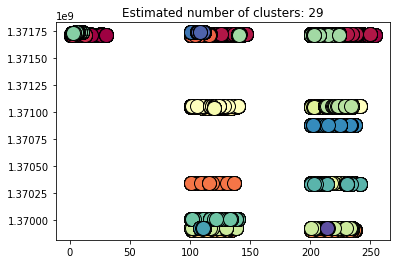

In [26]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()